# prepare data

In [4]:
# set up and import libraries--------------------------------
library(dplyr)
library(igraph)
library(ggplot2)
# library(org.Mm.eg.db)
# library(clusterProfiler)
# library(data.table)
# library(RColorBrewer)
# library(xlsx)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [4]:
par(family = "sans")
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/gsea.R')
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/utils.R')
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/unpairedtTest.R')

In [334]:
tag <- 'subset_TFs_v2'
file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TexTerm/mean_TexTerm_edge_weight_',tag,'.csv')
df1 <- read.csv(file, row.names = 1)
names(df1) <- firstUp(names(df1))

file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TRM/mean_TRM_edge_weight_',tag,'.csv')
df2 <- read.csv(file, row.names = 1)
names(df2) <- firstUp(names(df2))

head(df1)
dim(df1)
head(df2)
dim(df2)


,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf7,Batf,Bbx,Bcl6,⋯,Zfp398,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,0,0.000000,0.000000,0.000000,0.000000,8.047992,4.191211,0.00000,4.224679,2.284394,⋯,0.000000,0.000000,0.000000,0.000000,1.574840,0.000000,0.00000,0.4862167,5.250953,0
0610009B22RIK,0,0.000000,8.034914,7.755197,7.727369,10.154226,8.928981,12.02092,4.218905,2.004101,⋯,0.000000,4.137407,0.000000,0.000000,0.000000,3.394022,18.51342,0.0000000,10.211687,0
0610009E02RIK,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.514115,⋯,0.000000,0.000000,0.000000,0.000000,1.290968,0.000000,0.00000,0.0000000,0.000000,0
0610009L18RIK,0,3.535508,8.272055,7.792067,6.186838,12.953496,6.772344,0.00000,4.229038,0.000000,⋯,2.312671,0.000000,3.253367,3.565556,3.087408,7.315779,16.97179,0.3849736,13.320289,0
0610009O20RIK,0,2.829764,5.850666,8.250112,5.537141,0.000000,2.676284,12.32866,4.228595,3.228577,⋯,3.044176,0.000000,5.454378,3.319773,1.565702,5.091314,0.00000,0.4923388,8.054818,0
0610010F05RIK,0,2.764324,3.549189,0.000000,6.128912,10.019813,5.624563,0.00000,5.424690,3.845737,⋯,2.851530,0.000000,0.000000,0.000000,1.730611,4.005657,0.00000,0.0000000,10.195432,0


[1] 17270   170

,Ahr,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,Bbx,⋯,Zfp287,Zfp335,Zfp341,Zfp398,Zfp422,Zfp566,Zfp64,Zfp692,Zfp740,Zfx
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13RIK,0.0000000,5.975511,6.381163,5.022280,6.747390,1.266362,0.000000,6.724229,0.000000,2.389105,⋯,5.153568,0.000000,1.770007,1.813868,0.000000,2.034332,0.000000,2.709812,0.000000,5.127461
0610007P14RIK,0.0000000,4.167121,3.535061,4.735810,4.749356,1.189874,0.000000,4.766010,11.851958,0.000000,⋯,0.000000,3.227020,1.965665,3.507096,0.000000,2.238249,1.483430,0.000000,0.000000,6.214851
0610009B22RIK,0.4264933,5.945785,5.635031,7.543411,9.927795,1.321914,8.794489,10.223460,6.968299,2.749225,⋯,0.000000,0.000000,2.870961,0.000000,0.000000,3.071097,2.309261,3.475728,9.095212,8.836642
0610009E02RIK,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,1.860930,0.000000,0.000000,1.476158,0.000000,0.000000,0.000000,2.394368
0610009L18RIK,0.0000000,6.158894,5.560441,6.085988,9.713248,1.449755,0.000000,9.118931,9.105332,2.900007,⋯,0.000000,2.712204,3.361033,2.862971,3.433827,5.514416,5.171339,3.327339,8.701555,10.515600
0610009O20RIK,0.0000000,4.338419,5.924785,5.442499,0.000000,2.146178,0.000000,0.000000,8.901524,2.389150,⋯,8.481504,3.339015,2.068304,3.242943,5.689882,2.197942,3.144889,2.793895,0.000000,8.201577


[1] 20214   159

In [44]:
# 1. regulatee filtering: select top n for each TF and the lowest edge weight has to be larger than 0
top = 500

df11 <- df1 %>% tibble::rownames_to_column('gene') %>% tidyr::gather(column, value, -gene)
selected_genes1 = df11 %>% group_by(column) %>% top_n(top) %>% filter(value>0) %>% pull(gene) %>% unique()
length(selected_genes1)
df1 <- df1[selected_genes1,]

df22 <- df2 %>% tibble::rownames_to_column('gene') %>% tidyr::gather(column, value, -gene)
selected_genes2 = df22 %>% group_by(column) %>% top_n(top) %>% filter(value>0) %>% pull(gene) %>% unique()
length(selected_genes2)
df2 <- df2[selected_genes2,]


Selecting by value


[1] 13220

Selecting by value


[1] 15008

In [45]:
# make sure the order is not messed up
common_genes = union(rownames(df1), rownames(df2))
union_tfs = union(names(df1), names(df2))
length(common_genes)
length(union_tfs)

d1  <- as.data.frame(matrix(0, ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
d1[rownames(d1) %in% rownames(df1),names(d1)%in%names(df1)] <- df1
d1 <- d1[order(rownames(d1)), order(names(d1))]
dim(d1)
head(d1)
tail(d1)

[1] 17483

[1] 198

[1] 17483   198

,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,⋯,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp692,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13RIK,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.0000000,0.000000,0
0610007P14RIK,0,0.000000,0.000000,0.000000,0.000000,8.047992,0,0,4.191211,0.00000,⋯,0.000000,0.000000,0.000000,1.574840,0.000000,0,0.00000,0.4862167,5.250953,0
0610009B22RIK,0,0.000000,8.034914,7.755197,7.727369,10.154226,0,0,8.928981,12.02092,⋯,4.137407,0.000000,0.000000,0.000000,3.394022,0,18.51342,0.0000000,10.211687,0
0610009E02RIK,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,1.290968,0.000000,0,0.00000,0.0000000,0.000000,0
0610009L18RIK,0,3.535508,8.272055,7.792067,6.186838,12.953496,0,0,6.772344,0.00000,⋯,0.000000,3.253367,3.565556,3.087408,7.315779,0,16.97179,0.3849736,13.320289,0
0610009O20RIK,0,2.829764,5.850666,8.250112,5.537141,0.000000,0,0,2.676284,12.32866,⋯,0.000000,5.454378,3.319773,1.565702,5.091314,0,0.00000,0.4923388,8.054818,0


,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,⋯,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp692,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZXDC,0.000000,0,0.000000,0.000000,0,7.071718,0,0,3.362527,0,⋯,0,0,0.000000,1.580703,4.003153,0,0.000000,0.0000000,3.647751,2.744414
ZYG11A,0.000000,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0,⋯,0,0,0.000000,0.000000,0.000000,0,0.000000,0.0000000,0.000000,0.000000
ZYG11B,0.000000,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0,⋯,0,0,0.000000,0.000000,4.246906,0,6.444615,0.0000000,5.336159,2.137334
ZYX,0.000000,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0,⋯,0,0,0.000000,1.940840,4.964722,0,0.000000,0.0000000,7.370010,0.000000
ZZEF1,0.000000,0,5.850651,0.000000,0,0.000000,0,0,0.000000,0,⋯,0,0,3.647195,1.717759,4.644601,0,6.271880,0.0000000,10.342703,0.000000
ZZZ3,1.523123,0,10.152624,8.366389,0,0.000000,0,0,0.000000,0,⋯,0,0,3.075769,2.305339,2.874990,0,7.730023,0.4435935,12.996193,1.914147


In [47]:
# make sure the order is not messed up
common_genes = union(rownames(df2), rownames(df1))
union_tfs = union(names(df2), names(df1))
length(common_genes)
length(union_tfs)
d2 <- as.data.frame(matrix(0, ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
d2[rownames(d2) %in% rownames(df2),names(d2)%in%names(df2)] <- df2
d12 <- d2[order(rownames(d2)), order(names(d2))]
dim(d2)
head(d2)
tail(d2)

[1] 17483

[1] 198

[1] 17483   198

,Ahr,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,Bbx,⋯,Vax2,Zbtb14,Zbtb20,Zbtb49,Zfp213,Zfp324,Zfp410,Zfp523,Zfp768,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1110008L16RIK,1.4175810,2.533388,0.000000,2.931153,0.000000,0.2438300,0.00000,0.000000,0.000000,0.000000,⋯,0,0,0,0,0,0,0,0,0,0
1110032F04RIK,1.3340195,6.923985,2.504868,0.000000,3.711221,2.1858591,0.00000,3.957271,14.401361,2.963144,⋯,0,0,0,0,0,0,0,0,0,0
1700082M22RIK,0.9872540,2.923206,0.000000,0.000000,3.673878,0.3647113,0.00000,3.604341,5.340467,2.741970,⋯,0,0,0,0,0,0,0,0,0,0
1810013L24RIK,1.0519631,3.322695,2.188829,0.000000,5.150519,1.3345530,0.00000,5.401046,10.353092,3.336894,⋯,0,0,0,0,0,0,0,0,0,0
1810034E14RIK,0.9477892,3.841992,5.069157,6.149059,10.441491,0.5187389,15.32443,9.696369,5.422863,2.960844,⋯,0,0,0,0,0,0,0,0,0,0
2010012O05RIK,1.0843889,1.746310,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000,0.000000,2.306732,⋯,0,0,0,0,0,0,0,0,0,0


,Ahr,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,Bbx,⋯,Vax2,Zbtb14,Zbtb20,Zbtb49,Zfp213,Zfp324,Zfp410,Zfp523,Zfp768,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RP24-210N1.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SLA2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SLC12A9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SMIM24,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SOS2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
WBSCR22,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [51]:
# write to file
df_fc = log2((d1+1e-5)/(d2+1e-5))
head(df_fc)
write.csv(df_fc, paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_top",top,"_genes.csv"))

,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,⋯,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp692,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13RIK,-17.11308,-17.9507140,0.0000000,-18.1611137,0.0000000,-14.573647,0.0000,0.00000,0.0000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0
0610007P14RIK,-17.02543,-19.4012452,-17.9343811,0.0000000,-18.5015384,1.880424,0.0000,-18.59415,-1.7807636,-18.176774,⋯,0.00000,0.00000,0.00000,17.26486,0.00000,0,0.00000,15.56934,19.00222,0
0610009B22RIK,-16.59115,-18.1571970,19.6159249,19.5648057,1.0726713,4.799144,0.0000,-18.45938,0.7415285,2.132259,⋯,18.65837,0.00000,0.00000,0.00000,18.37264,0,20.82014,0.00000,19.96179,0
0610009E02RIK,-16.68274,-18.3419988,-17.7398062,0.0000000,-18.9743612,-17.026008,0.0000,-19.04288,-19.9816316,-18.348151,⋯,0.00000,0.00000,0.00000,16.97810,0.00000,0,0.00000,0.00000,0.00000,0
0610009L18RIK,-16.53229,-0.1199366,0.7064989,0.3416398,-0.7550526,4.642163,-20.5474,-19.88709,0.3206001,-18.175654,⋯,0.00000,18.31158,18.44377,18.23604,19.48065,0,20.69471,15.23251,20.34520,0
0610009O20RIK,-16.72654,0.6963692,19.1582437,19.6540559,19.0787844,0.000000,0.0000,0.00000,18.0298772,2.418088,⋯,0.00000,19.05706,18.34073,17.25646,18.95768,0,0.00000,15.58739,19.61949,0


# heatmap

In [338]:
# filter out rows and columns with only one value, i.e. all zeros
top = 500
df_fc <- read.csv(paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_top",top,"_genes.csv"), row.names = 1)
df_fc = df_fc[apply(df_fc,MARGIN = 1, FUN = function(x) length(unique(x)) > 1),apply(df_fc,MARGIN = 2, FUN = function(x) length(unique(x)) > 1)]
df_fc                                                                                     

,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,⋯,Zfp398,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13RIK,-17.1130819,-17.95071399,0.0000000,-18.1611137,0.00000000,-14.573647,0.00000,0.00000,0.00000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0610007P14RIK,-17.0254311,-19.40124518,-17.9343811,0.0000000,-18.50153843,1.880424,0.00000,-18.59415,-1.78076364,-18.176774,⋯,0.00000,0.00000,0.00000,0.00000,17.26486,0.00000,0.00000,15.56934,19.00222,0.00000
0610009B22RIK,-16.5911482,-18.15719703,19.6159249,19.5648057,1.07267133,4.799144,0.00000,-18.45938,0.74152855,2.132259,⋯,0.00000,18.65837,0.00000,0.00000,0.00000,18.37264,20.82014,0.00000,19.96179,0.00000
0610009E02RIK,-16.6827383,-18.34199885,-17.7398062,0.0000000,-18.97436115,-17.026008,0.00000,-19.04288,-19.98163163,-18.348151,⋯,0.00000,0.00000,0.00000,0.00000,16.97810,0.00000,0.00000,0.00000,0.00000,0.00000
0610009L18RIK,-16.5322939,-0.11993660,0.7064989,0.3416398,-0.75505260,4.642163,-20.54740,-19.88709,0.32060005,-18.175654,⋯,17.81921,0.00000,18.31158,18.44377,18.23604,19.48065,20.69471,15.23251,20.34520,0.00000
0610009O20RIK,-16.7265360,0.69636924,19.1582437,19.6540559,19.07878436,0.000000,0.00000,0.00000,18.02987723,2.418088,⋯,18.21570,0.00000,19.05706,18.34073,17.25646,18.95768,0.00000,15.58739,19.61949,0.00000
0610010F05RIK,-16.6243875,-0.35455691,1.0534160,0.0000000,0.38777660,3.003591,-20.51792,-18.99798,-0.54247250,0.000000,⋯,18.12138,0.00000,0.00000,0.00000,17.40093,18.61168,0.00000,0.00000,19.95949,0.00000
0610010K14RIK,-16.5601186,0.00000000,19.3909151,18.3069425,-0.14595376,19.889902,0.00000,-18.93040,18.76776273,-18.145950,⋯,18.18931,0.00000,0.00000,0.00000,17.57447,17.45852,19.63417,14.51270,19.77578,0.00000
0610011F06RIK,-16.5145493,-18.45983180,0.9547922,19.5775647,19.23884702,20.192525,0.00000,0.00000,19.07470303,0.000000,⋯,17.75108,0.00000,0.00000,18.76897,0.00000,0.00000,20.05252,0.00000,19.55513,0.00000


In [339]:
# silhouette width
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/findOptimal.R')
findOptimal(df_fc, file=paste0('select_k_top_',top,'.png'))

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

png 
  2

In [ ]:
# elbow curve
max_k = 50
wcss <- numeric(length = max_k)
silhouette <- numeric(length = max_k)

for (i in 2:max_k) {
  kmeans_model <- kmeans(df_fc, centers = i, nstart = 25)
  wcss[i] <- kmeans_model$tot.withinss
  tmp <- cluster::silhouette(kmeans_model$cluster, dist(df_fc))
  silhouette[i] <- summary(tmp)$avg.width
}

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 851150)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 851150)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

In [59]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_elbow_silhouette_width_k_top_',top,"_",tag,".pdf")

pdf(file)
plot(2:max_k, wcss[-1], type = "b", xlab = "Number of clusters (k)", ylab = "Within-cluster sum of squares (WCSS)")
plot(2:max_k, silhouette[-1], type = "b", xlab = "Number of clusters (k)", ylab = "Average silhouette width")
dev.off()

png 
  2

In [60]:
# manually check, select k=16
set.seed(123)
k = 16
kmeans_model <- kmeans(df_fc, centers = k)
print(kmeans_model)

Warning message:
“did not converge in 10 iterations”


K-means clustering with 16 clusters of sizes 1217, 1262, 824, 862, 1005, 797, 1044, 1423, 1576, 1048, 1146, 990, 1216, 1020, 1119, 474

Cluster means:
           Ahr      Arid3a        Arnt      Arntl         Atf1        Atf2
1  -1.61864171 -12.8152123  -7.1658196  -6.933894  -8.20898700 -10.0019654
2  -0.19607405  -6.1521616  -3.2679976  -4.407867  -0.28113123   0.8143503
3   1.43406369   2.5078283   7.1792861   3.590336   1.59607765  -1.0659486
4  -1.46292426  -4.6674243  -5.2725537  -5.071644  -5.66011603  -4.4421597
5   1.41612543   3.8321973  10.3461842   6.888258   5.92939191   6.5080656
6  -0.30400596  -2.7747104  -1.3057424  -1.662249  -2.53318601  -4.1255778
7   2.38611367   8.6842849  12.9732261  10.416657  10.43108684  10.8701610
8  -2.96358400 -15.6580060 -13.0669907 -11.288659 -12.39974096 -13.7958042
9  -1.54688128  -9.3285367  -6.8780306  -5.947922  -6.20979219  -4.0701460
10 -0.05436227  -4.8424665  11.3360903  11.563930   1.90427865   1.6066059
11  1.73957420   3.03341

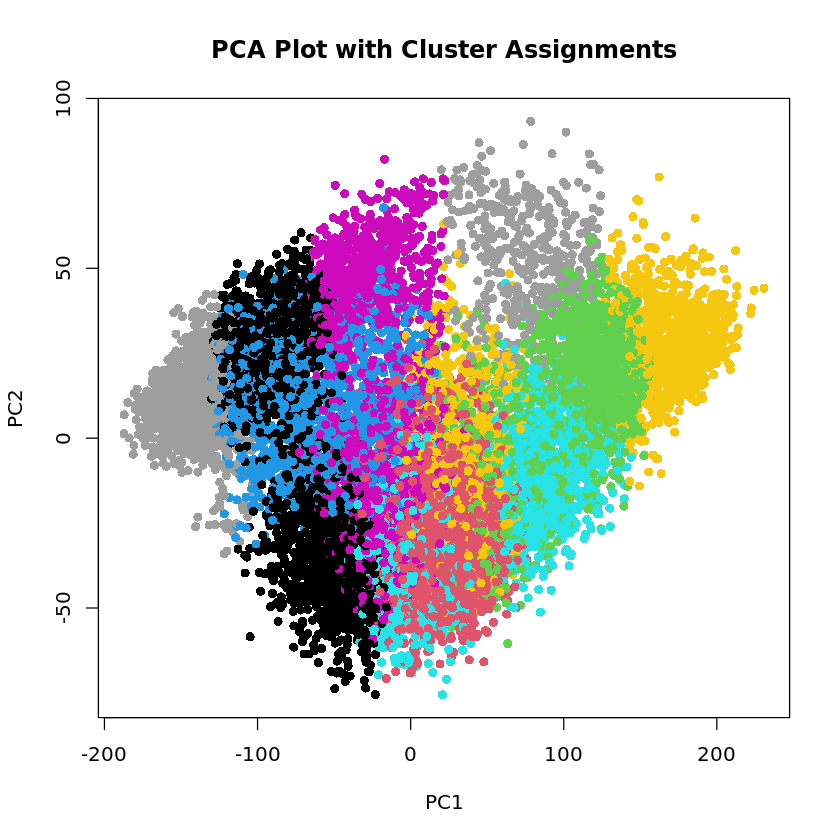

In [61]:
# Perform PCA
pca_result <- prcomp(df_fc)

# Plot PCA plot with cluster assignments
plot(pca_result$x[, 1:2], col = kmeans_model$cluster, pch = 16, 
     xlab = "PC1", ylab = "PC2", main = "PCA Plot with Cluster Assignments")


In [64]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2.pdf")
p <- pheatmap::pheatmap(kmeans_model$centers,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = T,
#               annotation_col = annotation_col, 
              annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [65]:
# extract kmeans member
output = as.data.frame(kmeans_model$cluster) %>% tibble::rownames_to_column('gene')
names(output) = c('gene','kmeans_cluster')
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_cluster_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.csv")
write.csv(output, file)

# selected targets

In [68]:
#### select subset of TFs
gtx = c('Tfdp1','Irf8','Arid3a','Jdp2','Etv5','Zfp410','Zscan20','Zfp324','Nfatc1')
gc = c('Nr4a2','Stat3','Nfil3','Hic1','Prdm1','Gfi1','Ikzf3')
gtr = c('Fosb')
gtt = union(gtr,union(gc,gtx))

# set column annotation
group_sorted = data.frame(tf = gtt) %>% mutate(Group=ifelse(tf %in% gc, 'Multi-tasker', ifelse(tf %in% gtx, 'TEX', 'TRM')))
group_sorted$Group = factor(group_sorted$Group, levels = c('TRM','Multi-tasker','TEX'))
group_sorted = group_sorted[order(group_sorted$Group),]

# # create data
# df_fc = df_fc[,group_sorted$tf]
# # filter out rows and columns with only one value
# df_fc = df_fc[apply(df_fc,MARGIN = 1, FUN = function(x) length(unique(x)) > 1),apply(df_fc,MARGIN = 2, FUN = function(x) length(unique(x)) > 1)]
data2 = kmeans_model$centers[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data2)
mycolors <- list(TF = c("#009051","#A020F0","#8AAA75"))
names(mycolors$TF) <- unique(group_sorted$Group)

In [71]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.pdf")
p <- pheatmap::pheatmap(data2,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F, 
              gaps_col=c(1,8), cutree_rows = 3,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(9),  
              filename=file)

# merge two network graphs

In [12]:
setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')

In [13]:
# load two networks first
g1 <- readRDS('../TexTerm/graph_shrinkage_res0.9_s0.15_TexTerm_subset_TFs_v2.rds')
g2 <- readRDS('../TRM/graph_shrinkage_res0.9_s0.15_TRM_subset_TFs_v2.rds')
gv1 <- as_data_frame(g1, "vertices")
gv2 <- as_data_frame(g2, "vertices")

This graph was created by an old(er) igraph version.
  Call upgrade_graph() on it to use with the current igraph version
  For now we convert it on the fly...

This graph was created by an old(er) igraph version.
  Call upgrade_graph() on it to use with the current igraph version
  For now we convert it on the fly...



In [14]:
common_tfs <- intersect(gv1$name, gv2$name)
tex_tfs <- setdiff(gv1$name, gv2$name)
trm_tfs <- setdiff(gv2$name, gv1$name)

In [15]:
# gv1 |> filter(name=='Klf6')
# gv2 |> filter(name=='Klf6')
# common_tfs
as_data_frame(g1, "edges") |> filter(to=='Klf6')

from,to,corr,color,width,lty,weight
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Ahr,Klf6,0.136942461,gray80,0.20541369,0,10
E2f1,Klf6,0.185717119,gray80,0.27857568,0,10
E2f3,Klf6,0.081053946,gray80,0.12158092,0,10
E2f4,Klf6,0.152549253,gray80,0.22882388,0,10
E2f6,Klf6,0.175850347,gray80,0.26377552,0,10
Egr1,Klf6,0.200214336,gray80,0.30032150,0,10
Egr2,Klf6,0.176407119,gray80,0.26461068,0,10
Hmg20b,Klf6,0.014435091,gray80,0.02165264,0,1
Ikzf3,Klf6,0.154717944,gray80,0.23207692,0,10


In [197]:
# extract node info
# ignore original node community info
gv1 <- as_data_frame(g1, "vertices") %>% select(name, frame.color, label, label.color, label.cex, label.dist) %>% mutate(label=name)
gv2 <- as_data_frame(g2, "vertices") %>% select(name, frame.color, label, label.color, label.cex, label.dist) %>% mutate(label=name)
attrs <- rbind(gv1, gv2) %>% unique() %>% mutate(group=ifelse(name %in% common_tfs, 'Common', ifelse(name %in% tex_tfs, 'Tex', 'Trm')), 
                                                 # color=ifelse(name %in% common_tfs, '#A020F0', ifelse(name %in% tex_tfs, '#7F6000', '#009051'))
                                                 color=ifelse(name %in% common_tfs, '#CBA2FF', ifelse(name %in% tex_tfs, '#BB8666', '#98D7AD'))
                                                )
attrs

,name,frame.color,label,label.color,label.cex,label.dist,group,color
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Bhlhe40,Bhlhe40,gray,Bhlhe40,black,0.75,0.4,Common,#CBA2FF
Nr4a2,Nr4a2,gray,Nr4a2,black,0.75,0.4,Common,#CBA2FF
Snai3,Snai3,gray,Snai3,black,0.75,0.4,Common,#CBA2FF
Xbp1,Xbp1,gray,Xbp1,black,0.75,0.4,Common,#CBA2FF
Egr1,Egr1,gray,Egr1,black,0.75,0.4,Common,#CBA2FF
Nfil3,Nfil3,gray,Nfil3,black,0.75,0.4,Common,#CBA2FF
Gfi1,Gfi1,gray,Gfi1,black,0.75,0.4,Common,#CBA2FF
Crem,Crem,gray,Crem,black,0.75,0.4,Common,#CBA2FF
Tef,Tef,gray,Tef,black,0.75,0.4,Common,#CBA2FF


In [224]:
# # extract edge info: only keep context-specific edges
# ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
# ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
# ge <- ge1 %>% full_join(ge2, by = c('from','to')) %>% mutate(corr=ifelse(is.na(corr.x), corr.y, ifelse(is.na(corr.y), corr.x, NA)),
#                                                              edge.color=ifelse(is.na(corr.x), '#009051', ifelse(is.na(corr.y), '#7F6000', NA))) %>% 
#         select(from, to, corr, edge.color) %>% na.omit()
# ge

In [18]:
# extract edge info: take mean if edge exists in both networks
ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
ge <- ge1 %>% full_join(ge2, by = c('from','to')) %>% mutate(corr=ifelse(is.na(corr.x), corr.y, ifelse(is.na(corr.y), corr.x, (corr.x+corr.y)/2)),
                                                            edge.color=ifelse(is.na(corr.x), '#009051', ifelse(is.na(corr.y), '#8AAA75', '#808080')),
                                                            type=ifelse(is.na(corr.x), 'trm', ifelse(is.na(corr.y), 'tex', 'common'))
                                                            ) |> 
        select(from,to,corr,edge.color,type) |> na.omit()
        # select(from, to, corr, type) %>% na.omit()
ge

,from,to,corr,edge.color,type
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Ahr,Arid3a,0.01439882,#8AAA75,tex
2,Ahr,Arnt,0.04564220,#8AAA75,tex
3,Arnt,Arntl,0.92426060,#808080,common
4,Ahr,Atf1,0.06775641,#808080,common
5,Atf1,Atf2,0.13622241,#808080,common
6,Atf1,Atf7,0.62322606,#808080,common
7,Atf2,Atf7,1.90185632,#808080,common
8,Arid3a,Bbx,0.69002942,#8AAA75,tex
9,Arnt,Bhlhe40,0.63439576,#808080,common


In [305]:
# only context-specific edges
# ge2 <- ge %>% filter(edge.color!='#808080')
ge2 <- ge %>% filter(type!='common')
head(ge2)
dim(ge2)

,from,to,corr,edge.color,type
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Ahr,Arid3a,0.01439882,#8AAA75,tex
2,Ahr,Arnt,0.04564220,#8AAA75,tex
3,Arid3a,Bbx,0.69002942,#8AAA75,tex
4,Arid3a,Bhlhe41,0.07246266,#8AAA75,tex
5,Arnt,Bhlhe41,0.58125593,#8AAA75,tex
6,Arntl,Bhlhe41,0.54210823,#8AAA75,tex


[1] 2451    5

In [298]:
g <- graph_from_data_frame(ge, directed = FALSE, vertices = attrs)
print(g, e=TRUE, v=TRUE)

IGRAPH 92d980b UN-- 198 3341 -- 
+ attr: name (v/c), frame.color (v/c), label (v/c), label.color (v/c),
| label.cex (v/n), label.dist (v/n), group (v/c), color (v/c), corr
| (e/n), edge.color (e/c)
+ edges from 92d980b (vertex names):
 [1] Ahr    --Arid3a  Ahr    --Arnt    Arnt   --Arntl   Ahr    --Atf1   
 [5] Atf2   --Atf1    Atf1   --Atf7    Atf2   --Atf7    Arid3a --Bbx    
 [9] Bhlhe40--Arnt    Bhlhe40--Arntl   Bhlhe41--Arid3a  Bhlhe41--Arnt   
[13] Bhlhe41--Arntl   Bhlhe40--Bhlhe41 Ahr    --Cbfb    Cbfb   --Atf1   
[17] Batf   --Cbfb    Cebpb  --Atf2    Ahr    --Creb1   Creb1  --Atf1   
[21] Creb1  --Atf2    Creb1  --Atf7    Bhlhe41--Creb1   Crem   --Ahr    
+ ... omitted several edges


In [212]:
# Leiden clustering
res = 0.9
set.seed(42)
clustering = cluster_leiden(g, objective_function="modularity",resolution_parameter=res)
print(clustering)
print(sizes(clustering))
print(paste0('modularity:',modularity(g, membership(clustering))))

IGRAPH clustering leiden, groups: 5, mod: NA
+ groups:
  $`1`
   [1] "Bhlhe40" "Xbp1"    "Nfil3"   "Gfi1"    "Crem"    "Tef"     "Max"    
   [8] "Setbp1"  "Thrb"    "Jun"     "Heyl"    "Bhlhe41" "Zfp410"  "Zbtb20" 
  [15] "Tfeb"    "Cebpb"   "Jdp2"    "Creb1"   "Usf1"    "Atf2"    "Arnt"   
  [22] "Mlx"     "Srebf1"  "Atf1"    "Stat5b"  "Arntl"   "Tfe3"    "Atf7"   
  [29] "Gmeb1"   "Glis3"   "Atf3"    "Atf4"    "Usf2"   
  
  $`2`
   [1] "Nr4a2"   "Zbtb3"   "Homez"   "Ddit3"   "Irf4"    "Hmg20b"  "Meox2"  
   [8] "Fos"     "Isl2"    "Prdm1"   "Nfe2l1"  "Dmrt2"   "Klf9"    "Eomes"  
  + ... omitted several groups/vertices
Community sizes
 1  2  3  4  5 
33 70 26 54 15 
[1] "modularity:0.343706407319436"


In [213]:
# add meta
cut_off = 0.9

# generate label for all nodes
V(g)$label <- V(g)$name

V(g)$label.color <- 'black'
V(g)$size <- 0.1*degree(g)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 0.5 # all label

# set distance of label
V(g)$label.dist <- 0.4

# set edge color
E(g)$color <- "gray80"
E(g)$size <- 0.1
E(g)$width <- 1.5*E(g)$corr
E(g)$lty <- ifelse(E(g)$corr>=unname(quantile(E(g)$corr, cut_off)), 1, 0) # only show top edges

# # only show edges that between labeled TFs
# # lty=0 means that the edge won't be shown, default is 1
# E(g)$lty <- unlist(lapply(E(g), function(x) {
#     ifelse(V(g)$group[V(g)$name == ends(g, x)[1]] == "Common" | V(g)$group[V(g)$name == ends(g, x)[2]] == "Common", 0, 1)
# }))

# set the within-module edges to some large weight, and the between module edges to some small weight
# and then choose 'layout_with_fr' to make the grouped layout 
edge.weights <- function(community, network, weight.within = 10, weight.between = 1) {
    bridges <- crossing(communities = community, graph = network)
    weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
    return(weights) 
}
E(g)$weight <- edge.weights(clustering, g)

In [214]:
# set.seed(18)  # TexTerm 
set.seed(9)  # TRM 
pdf("merged_graph.pdf", width = 8, height = 8)
plot(g, layout=layout_with_fr)
dev.off()

png 
  2

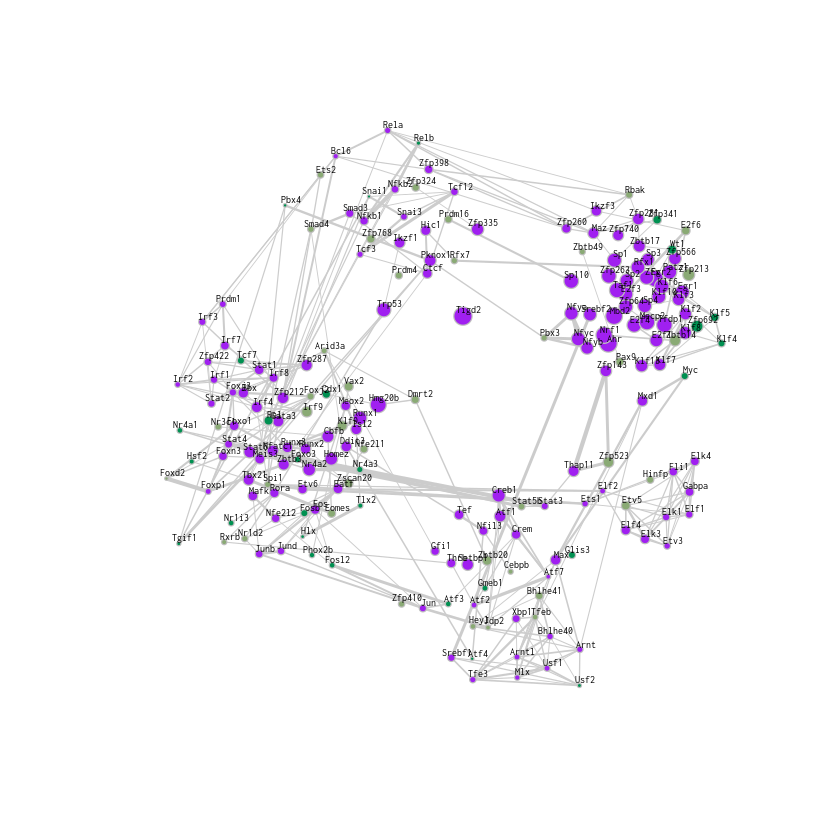

In [216]:
plot(g, layout=layout_with_fr)

In [230]:
pdf("merged_graph.pdf", width = 8, height = 8)
set.seed(9)  # TRM 
plot(clustering,g, layout=layout_with_fr, col=V(g)$color, edge.color='gray80', 
     mark.col=paste0(RColorBrewer::brewer.pal(length(clustering),"Set2"),'3f'), mark.border='black')
dev.off()

png 
  2

## use original community as attribute

In [16]:
# extract node info
# consider original node community by mark the conflicting as "multi"
gv1 <- as_data_frame(g1, "vertices") %>% select(name, cluster)
gv2 <- as_data_frame(g2, "vertices") %>% mutate(cluster2=ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster)))%>% select(name, cluster2)
attrs2 <- gv1 %>% full_join(gv2, by=c('name')) %>% 
        mutate(group=ifelse(name %in% common_tfs, 'Common', ifelse(name %in% tex_tfs, 'Tex', 'Trm')), 
               # color=ifelse(name %in% common_tfs, '#A020F0', ifelse(name %in% tex_tfs, '#7F6000', '#009051')), 
               color=ifelse(name %in% common_tfs, '#C0C0C0', ifelse(name %in% tex_tfs, '#BB8666', '#98D7AD')),
               cluster_c=ifelse(is.na(cluster),cluster2,ifelse(is.na(cluster2), cluster,ifelse(cluster==cluster2, cluster, 'mixed'))))
attrs2

name,cluster,cluster2,group,color,cluster_c
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Bhlhe40,1,1,Common,#C0C0C0,1
Nr4a2,2,2,Common,#C0C0C0,2
Snai3,3,3,Common,#C0C0C0,3
Xbp1,1,1,Common,#C0C0C0,1
Egr1,4,4,Common,#C0C0C0,4
Nfil3,2,2,Common,#C0C0C0,2
Gfi1,2,2,Common,#C0C0C0,2
Crem,2,1,Common,#C0C0C0,mixed
Tef,2,1,Common,#C0C0C0,mixed


In [9]:
attrs2 |> filter(cluster_c=='mixed') |> write.csv('../compare/mixed_members.csv')

In [10]:
attrs2 |> select(name, cluster, cluster2, group, cluster_c) |> write.csv('../compare/combined_network_clustering_198TFs.csv', quote=F, row.names=F)

In [227]:
# graph with only context-specific edges
g <- graph_from_data_frame(ge2, directed = FALSE, vertices = attrs2)
print(g, e=TRUE, v=TRUE)

IGRAPH 711ddd9 UN-- 198 2451 -- 
+ attr: name (v/c), cluster (v/n), cluster2 (v/n), group (v/c), color
| (v/c), cluster_c (v/c), corr (e/n), type (e/c)
+ edges from 711ddd9 (vertex names):
 [1] Ahr    --Arid3a  Ahr    --Arnt    Arid3a --Bbx     Bhlhe41--Arid3a 
 [5] Bhlhe41--Arnt    Bhlhe41--Arntl   Bhlhe40--Bhlhe41 Ahr    --Cbfb   
 [9] Cebpb  --Atf2    Ahr    --Creb1   Bhlhe41--Creb1   Crem   --Bhlhe41
[13] Ctcf   --Atf1    Ctcf   --Bbx     Cebpb  --Ctcf    Ddit3  --Arid3a 
[17] Ddit3  --Bbx     Ddit3  --Cebpb   Ahr    --Dmrt2   Dmrt2  --Arid3a 
[21] Dmrt2  --Batf    E2f1   --Batf    E2f1   --Cbfb    E2f1   --Dmrt2  
[25] Ahr    --E2f3    E2f3   --Cbfb    E2f3   --Dmrt2   Dmrt2  --E2f4   
+ ... omitted several edges


In [19]:
# graph with only all edges
g <- graph_from_data_frame(ge, directed = FALSE, vertices = attrs2)
print(g, e=TRUE, v=TRUE)

IGRAPH 78eedaf UN-- 198 3341 -- 
+ attr: name (v/c), cluster (v/n), cluster2 (v/n), group (v/c), color
| (v/c), cluster_c (v/c), corr (e/n), edge.color (e/c), type (e/c)
+ edges from 78eedaf (vertex names):
 [1] Ahr    --Arid3a  Ahr    --Arnt    Arnt   --Arntl   Ahr    --Atf1   
 [5] Atf2   --Atf1    Atf1   --Atf7    Atf2   --Atf7    Arid3a --Bbx    
 [9] Bhlhe40--Arnt    Bhlhe40--Arntl   Bhlhe41--Arid3a  Bhlhe41--Arnt   
[13] Bhlhe41--Arntl   Bhlhe40--Bhlhe41 Ahr    --Cbfb    Cbfb   --Atf1   
[17] Batf   --Cbfb    Cebpb  --Atf2    Ahr    --Creb1   Creb1  --Atf1   
[21] Creb1  --Atf2    Creb1  --Atf7    Bhlhe41--Creb1   Crem   --Ahr    
[25] Crem   --Atf1    Crem   --Atf2    Crem   --Atf7    Crem   --Bhlhe41
+ ... omitted several edges


In [235]:
# ge |> group_by(type) %>% slice_max(prop = 0.2, order_by = corr)|> write.csv('top0.2_interaction.csv',quote=F, row.names=F)
# ge |> group_by(type) %>% filter(corr>=quantile(E(g)$corr, 0.8))|> write.csv('top0.2_interaction.csv',quote=F, row.names=F)

In [130]:
ge |> arrange(type) |> write.csv('all_interaction.csv',quote=F, row.names=F)

In [17]:
ge |> group_by(type) %>% filter(corr>=quantile(E(g)$corr, 0.8)) |> tidyr::pivot_longer(!c('corr','type'), names_to='group', values_to = "tf") |> 
    distinct(type,tf) |> write.csv('top0.2_tfs_per_network.csv', quote=F, row.names=F)

In [20]:
G_Grouped = g
E(G_Grouped)$weight = 1

## Add edges with high weight between all nodes in the same group
for(i in unique(V(g)$cluster_c)) {
    GroupV = which(V(g)$cluster_c == i)
    G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=1.8))
} 

## Now create a layout based on G_Grouped
set.seed(567)
LO = layout_with_fr(G_Grouped)

In [10]:
E(g)

ERROR: Error in ensure_igraph(graph): object 'g' not found


In [281]:
get_figure <- function(x,ge,cut_off=0.8,label=F){
    g <- graph_from_data_frame(ge, directed = FALSE, vertices = attrs2)
    G_Grouped = g
    E(G_Grouped)$weight = 1
    
    ## Add edges with high weight between all nodes in the same group
    for(i in unique(V(g)$cluster_c)) {
        GroupV = which(V(g)$cluster_c == i)
        G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=1.8))
    } 
    
    ## Now create a layout based on G_Grouped
    set.seed(567)
    LO = layout_with_fr(G_Grouped)
    
    # get degree
    ge2 <- ge |> dplyr::filter(type==x)
    g2 <- graph_from_data_frame(ge2, directed = FALSE, vertices = attrs2) # to get customized node size in each context
    # generate label for all nodes
    V(g)$frame.color <- 'gray'
    V(g)$label <- NA
    if (label){V(g)$label <- V(g)$name}
    
    V(g)$label.color <- 'black'
    V(g)$size <- 0.2*degree(g2) # degree in each context
    # V(g)$label.cex <- 0.75 # part label
    V(g)$label.cex <- 0.5 # all label
    
    # set distance of label
    V(g)$label.dist <- 0.4
    
    # set edge color
    # E(g)$color <- "gray80"
    E(g)$color <- ifelse(E(g)$type=='common', '#C0C0C0', ifelse(E(g)$type=='trm', '#009051', '#945200'))
    E(g)$size <- 0.1
    E(g)$width <- 2*E(g)$corr
    E(g)$lty <- ifelse((E(g)$corr>=unname(quantile(E(g)$corr, cut_off))) & (E(g)$type==x), 1, 0)
    
    file = ifelse(label,paste0("merged_graph_v2_top",(1-cut_off),"_",x,"_labeled.pdf"),paste0("merged_graph_v2_top",(1-cut_off),"_",x,".pdf"))
    pdf(file, width = 8, height = 8)    
    plot(g, layout=LO)
    dev.off()
}

In [123]:
get_figure(x='common', g=g,ge=ge)

png 
  2

In [313]:
lapply(c('common','trm','tex'), function(x) get_figure(x=x, ge=ge, cut_off=0.8,label=T))
lapply(c('common','trm','tex'), function(x) get_figure(x=x, ge=ge, cut_off=0.8,label=F))
       

Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c05fc3db6e' for compression (reason: No such file or directory); compression has been turned off for this device”
Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c036306489' for compression (reason: No such file or directory); compression has been turned off for this device”
Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c0510ff4eb' for compression (reason: No such file or directory); compression has been turned off for this device”


[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2

Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c07f86e97e' for compression (reason: No such file or directory); compression has been turned off for this device”
Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c0f025b48' for compression (reason: No such file or directory); compression has been turned off for this device”
Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c07cca1781' for compression (reason: No such file or directory); compression has been turned off for this device”


[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2

In [293]:
c5_mem <- attrs2 |> filter(cluster2==5) |> pull(name)
ge |> dplyr::filter(type=='trm') |> dplyr::filter(from %in% c5_mem | to %in% c5_mem) |> arrange(-corr) |> write.csv('c5_trm_tfs_all_interactions.csv', quote=F, row.names=F)
ge |> dplyr::filter(type=='trm') |> dplyr::filter(from %in% c5_mem & to %in% c5_mem) |> arrange(-corr) |> write.csv('c5_trm_tfs_intra_interactions.csv', quote=F, row.names=F)


In [291]:
ge2 <- read.csv('top0.2_interaction.csv') |> filter(type=='trm') |> arrange(corr)
ge2

from,to,corr,type
<chr>,<chr>,<dbl>,<chr>
Crem,Gmeb1,0.2801849,trm
Snai1,Tcf3,0.2809024,trm
Klf5,Wt1,0.2819623,trm
Sp3,Zfp341,0.2820067,trm
Foxo1,Irf8,0.2830843,trm
E2f1,Klf4,0.2841103,trm
Atf3,Atf7,0.2843348,trm
Atf3,Xbp1,0.2847257,trm
Junb,Tgif1,0.2856073,trm


In [276]:
# 06/17/2024 update, select only C5 members in trm
get_figure <- function(x,ge,cut_off=0.8,label=F){
    c5_mem <- attrs2 |> filter(cluster2==5) |> pull(name)
    # get degree
    ge2 <- ge |> dplyr::filter(type==x) |> dplyr::filter(from %in% c5_mem | to %in% c5_mem)
    
    g <- graph_from_data_frame(ge2, directed = FALSE, vertices = attrs2)
    G_Grouped = g
    E(G_Grouped)$weight = 1
    
    ## Add edges with high weight between all nodes in the same group
    for(i in unique(V(g)$cluster_c)) {
        GroupV = which(V(g)$cluster_c == i)
        G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=1.8))
    } 
    
    ## Now create a layout based on G_Grouped
    set.seed(567)
    LO = layout_with_fr(G_Grouped)
    
    # generate label for all nodes
    V(g)$frame.color <- 'gray'
    V(g)$label <- NA
    if (label){V(g)$label <- V(g)$name}
    
    V(g)$label.color <- 'black'
    V(g)$size <- 0.2*degree(g) # degree in each context
    # V(g)$label.cex <- 0.75 # part label
    V(g)$label.cex <- 0.5 # all label
    
    # set distance of label
    V(g)$label.dist <- 0.4
    
    # set edge color
    # E(g)$color <- "gray80"
    E(g)$color <- ifelse(E(g)$type=='common', '#C0C0C0', ifelse(E(g)$type=='trm', '#009051', '#945200'))
    E(g)$size <- 0.1
    E(g)$width <- 2*E(g)$corr
    E(g)$lty <- ifelse((E(g)$corr>=unname(quantile(E(g)$corr, cut_off))) & (E(g)$type==x), 1, 0)
    
    file = ifelse(label,paste0("merged_graph_v2_top",(1-cut_off),"_",x,"_labeled.pdf"),paste0("merged_graph_v2_top",(1-cut_off),"_",x,".pdf"))
    pdf(file, width = 8, height = 8)    
    plot(g, layout=LO)
    dev.off()
}

In [278]:
get_figure(x='trm',ge=ge, cut_off=0.5,label=T)

Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c079c3af51' for compression (reason: No such file or directory); compression has been turned off for this device”


png 
  2

In [308]:
# g <- graph_from_data_frame(ge, directed = FALSE, vertices = attrs2)
# ge

In [311]:
# add meta
cut_off = 0.2
ge2 <- ge |> dplyr::filter(type=='trm')
g2 <- graph_from_data_frame(ge2, directed = FALSE, vertices = attrs2) # to get customized node size in each context

# generate label for all nodes
V(g)$frame.color <- 'gray'
V(g)$label <- V(g)$name
# V(g)$label <- NA

V(g)$label.color <- 'black'
V(g)$size <- 0.2*degree(g2)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 0.5 # all label

# set distance of label
V(g)$label.dist <- 0.4

# set edge color
# E(g)$color <- "gray80"
E(g)$color <- ge$edge.color
# E(g)$color <- ifelse(E(g)$type=='common', '#C0C0C0', ifelse(E(g)$type=='trm', '#009051', '#945200'))
E(g)$size <- 0.1
E(g)$width <- 2*E(g)$corr
# E(g)$lty <- ifelse(E(g)$corr>=unname(quantile(E(g)$corr, cut_off)), 1, 0) # only show top edges
# E(g)$lty <- ifelse((E(g)$corr>=unname(quantile(E(g)$corr, cut_off))) & (E(g)$edge.color=='#009051'), 1, 0) # only show TRM-specific edges
# E(g)$lty <- ifelse((E(g)$corr>=unname(quantile(E(g)$corr, cut_off))) & (E(g)$edge.color=='#945200'), 1, 0) # only show TEX-specific edges
# E(g)$lty <- ifelse((E(g)$corr>=unname(quantile(E(g)$corr, cut_off))) & (E(g)$edge.color=='#C0C0C0'), 1, 0) # only show common edges

In [312]:
pdf("merged_graph_v2_trm_labeled.pdf", width = 8, height = 8)
# pdf("merged_graph_v2_tex.pdf", width = 8, height = 8)
# pdf("merged_graph_v2_common_labeled.pdf", width = 8, height = 8)
# pdf("merged_graph_v2.pdf", width = 8, height = 8)

# pdf("test.pdf", width = 8, height = 8)
plot(g, layout=LO)
# plot(g, layout=layout_with_fr)
dev.off()

Warning message in plot.new():
“Cannot open temporary file '/tmp/RtmpsP1Voq/pdf2491c059406167' for compression (reason: No such file or directory); compression has been turned off for this device”


png 
  2

## only look at mixed members

In [87]:
# extract node info
# consider original node community by mark the conflicting as "multi"
gv1 <- as_data_frame(g1, "vertices") %>% select(name, cluster)
gv2 <- as_data_frame(g2, "vertices") %>% mutate(cluster2=ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster)))%>% select(name, cluster2)
attrs2 <- gv1 %>% full_join(gv2, by=c('name')) %>% 
        mutate(group=ifelse(name %in% common_tfs, 'Common', ifelse(name %in% tex_tfs, 'Tex', 'Trm')), 
               color=ifelse(name %in% common_tfs, '#A020F0', ifelse(name %in% tex_tfs, '#8AAA75', '#009051')), 
               cluster_c=ifelse(is.na(cluster),cluster2,ifelse(is.na(cluster2), cluster,ifelse(cluster==cluster2, cluster, 'mixed'))))
attrs2

name,cluster,cluster2,group,color,cluster_c
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Bhlhe40,1,1,Common,#A020F0,1
Nr4a2,2,2,Common,#A020F0,2
Snai3,3,3,Common,#A020F0,3
Xbp1,1,1,Common,#A020F0,1
Egr1,4,4,Common,#A020F0,4
Nfil3,2,2,Common,#A020F0,2
Gfi1,2,2,Common,#A020F0,2
Crem,2,1,Common,#A020F0,mixed
Tef,2,1,Common,#A020F0,mixed


In [223]:
attrs3 <- attrs2 %>% filter(cluster_c=='mixed')
nodes <- attrs3 %>% pull(name)
attrs3

name,cluster,cluster2,group,color,cluster_c
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Crem,2,1,Common,#A020F0,mixed
Tef,2,1,Common,#A020F0,mixed
Zbtb3,2,3,Common,#A020F0,mixed
Thrb,2,1,Common,#A020F0,mixed
Tigd2,1,3,Common,#A020F0,mixed
Hmg20b,5,2,Common,#A020F0,mixed
Zfp143,5,4,Common,#A020F0,mixed
Creb1,2,1,Common,#A020F0,mixed
Pknox1,3,4,Common,#A020F0,mixed


In [224]:
ge3 <- ge %>% filter(from %in% nodes & to %in% nodes)
ge3

from,to,corr,edge.color
<chr>,<chr>,<dbl>,<chr>
Atf1,Atf2,0.136222409,#A020F0
Atf1,Atf7,0.623226064,#A020F0
Atf2,Atf7,1.901856323,#A020F0
Atf1,Creb1,1.589815627,#A020F0
Atf2,Creb1,0.400715271,#A020F0
Atf7,Creb1,0.851403575,#A020F0
Atf1,Crem,1.186280774,#A020F0
Atf2,Crem,0.786873359,#A020F0
Atf7,Crem,1.197999724,#A020F0


In [233]:
g <- graph_from_data_frame(ge3, directed = FALSE, vertices = attrs3)
print(g, e=TRUE, v=TRUE)

IGRAPH 6b70e23 UN-- 18 46 -- 
+ attr: name (v/c), cluster (v/n), cluster2 (v/n), group (v/c), color
| (v/c), cluster_c (v/c), corr (e/n), edge.color (e/c)
+ edges from 6b70e23 (vertex names):
 [1] Atf2  --Atf1   Atf1  --Atf7   Atf2  --Atf7   Creb1 --Atf1   Creb1 --Atf2  
 [6] Creb1 --Atf7   Crem  --Atf1   Crem  --Atf2   Crem  --Atf7   Crem  --Creb1 
[11] Hmg20b--Pknox1 Pknox1--Meis3  Tef   --Atf1   Tef   --Atf2   Tef   --Atf7  
[16] Tef   --Creb1  Crem  --Tef    Tef   --Pknox1 Thrb  --Atf2   Thrb  --Atf7  
[21] Thrb  --Rora   Thrb  --Srebf2 Tigd2 --Hmg20b Tigd2 --Pknox1 Zbtb3 --Meis3 
[26] Pknox1--Zfp335 Zfp335--Srebf2 Tef   --Zfp335 Bcl6  --Zfp398 Zfp398--Srebf2
[31] Tef   --Zfp398 Zfp398--Zfp335 Hmg20b--Atf1   Pknox1--Srebf2 Srebf2--Rora  
+ ... omitted several edges


In [234]:
# add meta

# generate label for all nodes
V(g)$frame.color <- 'gray'
V(g)$label <- V(g)$name
V(g)$label.color <- 'black'
V(g)$size <- degree(g)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 1 # all label

# set distance of label
V(g)$label.dist <- 1

# set edge color
# E(g)$color <- "gray80"
E(g)$color <- ge3$edge.color
E(g)$size <- 1
E(g)$width <- 1.5*E(g)$corr

In [235]:
# pdf("merged_graph_v2.pdf", width = 8, height = 8)
pdf("merged_graph_v4.pdf")
plot(g, layout=layout_with_fr)
dev.off()

png 
  2

## individual TF community

In [12]:
ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#7F6000')
ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#009051')
ge <- rbind(ge1,ge2)
ge

from,to,corr,edge.color
<chr>,<chr>,<dbl>,<chr>
Ahr,Arid3a,0.01439882,#7F6000
Ahr,Arnt,0.04564220,#7F6000
Arnt,Arntl,0.93419276,#7F6000
Ahr,Atf1,0.12338835,#7F6000
Atf1,Atf2,0.03115523,#7F6000
Atf1,Atf7,0.55496631,#7F6000
Atf2,Atf7,2.20866098,#7F6000
Arid3a,Bbx,0.69002942,#7F6000
Arnt,Bhlhe40,0.73690916,#7F6000


In [20]:
ge |> filter(from == 'Prdm1' & to == 'Klf6')
ge |> filter(to == 'Prdm1' & from == 'Klf6')

from,to,corr,edge.color
<chr>,<chr>,<dbl>,<chr>


from,to,corr,edge.color
<chr>,<chr>,<dbl>,<chr>


In [16]:
g <- graph_from_data_frame(ge, directed = FALSE, vertices = attrs2)
print(g, e=TRUE, v=TRUE)

IGRAPH 474ed7f UN-- 198 4231 -- 
+ attr: name (v/c), cluster (v/n), cluster2 (v/n), group (v/c), color
| (v/c), cluster_c (v/c), corr (e/n), edge.color (e/c)
+ edges from 474ed7f (vertex names):
 [1] Ahr    --Arid3a  Ahr    --Arnt    Arnt   --Arntl   Ahr    --Atf1   
 [5] Atf2   --Atf1    Atf1   --Atf7    Atf2   --Atf7    Arid3a --Bbx    
 [9] Bhlhe40--Arnt    Bhlhe40--Arntl   Bhlhe41--Arid3a  Bhlhe41--Arnt   
[13] Bhlhe41--Arntl   Bhlhe40--Bhlhe41 Ahr    --Cbfb    Cbfb   --Atf1   
[17] Batf   --Cbfb    Cebpb  --Atf2    Ahr    --Creb1   Creb1  --Atf1   
[21] Creb1  --Atf2    Creb1  --Atf7    Bhlhe41--Creb1   Crem   --Ahr    
[25] Crem   --Atf1    Crem   --Atf2    Crem   --Atf7    Crem   --Bhlhe41
+ ... omitted several edges


In [339]:
id = 'Etv5'

In [340]:
ge3 <- ge %>% filter(from == id | to == id)
ge3
nodes <- union(ge3$from, ge3$to)

from,to,corr,edge.color
<chr>,<chr>,<dbl>,<chr>
Arntl,Etv5,0.115907771,#7F6000
Atf1,Etv5,0.056931268,#7F6000
Creb1,Etv5,0.059335812,#7F6000
Dmrt2,Etv5,0.146383182,#7F6000
Elf1,Etv5,0.293742025,#7F6000
Elf4,Etv5,0.863499836,#7F6000
Elk1,Etv5,0.677994132,#7F6000
Elk3,Etv5,1.280818178,#7F6000
Elk4,Etv5,0.589042753,#7F6000


In [314]:
tmp = ge3 %>% mutate(name=ifelse(from==id, to, from)) %>% select(name,edge.color)
names(tmp) = c('name','color')
attrs3 = rbind(tmp, data.frame('name'=id, 'color'='#A020F0'))%>% group_by(name) %>% summarize(n=n(),color=color) %>% mutate(color2=ifelse(n==2, '#A020F0',color)) %>% distinct(name,color2) %>% ungroup()
names(attrs3) <- c('name','color')
attrs3

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,color
<chr>,<chr>
Bbx,#A020F0
Bcl6,#A020F0
Creb1,#7F6000
Ets2,#7F6000
Foxo1,#7F6000
Ikzf1,#009051
Ikzf3,#A020F0
Irf1,#A020F0
Irf2,#A020F0


In [315]:
g <- graph_from_data_frame(ge3, directed = FALSE, vertices = attrs3)
g

IGRAPH 74faba2 UN-- 26 38 -- 
+ attr: name (v/c), color (v/c), corr (e/n), edge.color (e/c)
+ edges from 74faba2 (vertex names):
 [1] Bbx  --Prdm1  Bcl6 --Prdm1  Creb1--Prdm1  Ets2 --Prdm1  Foxo1--Prdm1 
 [6] Ikzf3--Prdm1  Irf1 --Prdm1  Irf2 --Prdm1  Irf3 --Prdm1  Irf4 --Prdm1 
[11] Irf7 --Prdm1  Irf8 --Prdm1  Irf9 --Prdm1  Nfkb1--Prdm1  Prdm1--Rela  
[16] Prdm1--Smad4  Prdm1--Stat1  Prdm1--Stat2  Prdm1--Zfp212 Prdm1--Zfp324
[21] Prdm1--Zfp398 Prdm1--Zfp422 Bbx  --Prdm1  Bcl6 --Prdm1  Ikzf1--Prdm1 
[26] Ikzf3--Prdm1  Irf1 --Prdm1  Irf2 --Prdm1  Irf3 --Prdm1  Irf4 --Prdm1 
[31] Irf7 --Prdm1  Irf8 --Prdm1  Prdm1--Rela   Prdm1--Stat2  Prdm1--Tcf7  
[36] Prdm1--Zfp212 Prdm1--Zfp260 Prdm1--Zfp398

In [316]:
# generate label for all nodes
# V(g)$frame.color <- 'gray'
# V(g)$label <- V(g)$name
V(g)$label.color <- 'black'
# V(g)$size <- 10*degree(g)
V(g)$size <- ifelse(V(g)$name == id, 12, 7)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 1 # all label

# set distance of label
V(g)$label.dist <- 1

# set edge color
# E(g)$color <- "gray80"
E(g)$color <- ge3$edge.color
E(g)$size <- 1
E(g)$width <- 3*E(g)$corr

In [328]:
G_Grouped = g
E(G_Grouped)$weight = 1

## make edges of the same type close to each other in the layout
for(i in unique(V(g)$color)) {
    GroupV = which(V(g)$color == i)
    G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=0.1))
} 

## Now create a layout based on G_Grouped
set.seed(567)
LO = layout_with_fr(G_Grouped)

In [331]:
set.seed(1)
pdf(paste0("merged_graph_",id,".pdf"))
plot(g, layout=LO)
# plot(g)
dev.off()

png 
  2

In [145]:
idx = as.numeric(V(g)[id])
gs <- induced_subgraph(g, c(id, names(neighbors(g, idx))))
gs

IGRAPH 877f379 UN-- 26 168 -- 
+ attr: name (v/c), cluster (v/n), cluster2 (v/n), group (v/c), color
| (v/c), cluster_c (v/c), label.cex (v/n), corr (e/n), edge.color (e/c)
+ edges from 877f379 (vertex names):
 [1] Irf4  --Prdm1  Irf4  --Smad4  Prdm1 --Smad4  Irf4  --Irf8   Prdm1 --Irf8  
 [6] Smad4 --Irf8   Prdm1 --Zfp324 Smad4 --Zfp324 Irf4  --Creb1  Prdm1 --Creb1 
[11] Irf8  --Creb1  Prdm1 --Rela   Zfp324--Rela   Irf4  --Irf3   Prdm1 --Irf3  
[16] Irf8  --Irf3   Zfp324--Irf3   Creb1 --Irf3   Rela  --Irf3   Prdm1 --Ikzf3 
[21] Zfp324--Ikzf3  Rela  --Ikzf3  Prdm1 --Ikzf1  Irf3  --Ikzf1  Ikzf3 --Ikzf1 
[26] Irf4  --Irf1   Prdm1 --Irf1   Irf8  --Irf1   Creb1 --Irf1   Irf3  --Irf1  
[31] Prdm1 --Zfp260 Zfp324--Zfp260 Rela  --Zfp260 Irf3  --Zfp260 Ikzf3 --Zfp260
+ ... omitted several edges

In [146]:
# generate label for all nodes
V(gs)$frame.color <- 'gray'
V(gs)$label <- V(gs)$name
V(gs)$label.color <- 'black'
V(gs)$size <- degree(gs)
# V(g)$label.cex <- 0.75 # part label
V(gs)$label.cex <- 1 # all label

# set distance of label
V(gs)$label.dist <- 1

# set edge color
# E(g)$color <- "gray80"
E(gs)$color <- ge$edge.color
E(gs)$size <- 1
E(gs)$width <- 1.5*E(gs)$corr

In [153]:
set.seed(1)
pdf(paste0("merged_graph_",id,".pdf"), width = 5, height = 5)
plot(gs, layout=layout_with_fr)
dev.off()

png 
  2

In [344]:
get_graph <- function(id){
    ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
    ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to))
    ge <- ge1 %>% full_join(ge2, by = c('from','to')) %>% mutate(corr=ifelse(is.na(corr.x), corr.y, ifelse(is.na(corr.y), corr.x, (corr.x+corr.y)/2)),
                                                            edge.color=ifelse(is.na(corr.x), '#009051', ifelse(is.na(corr.y), '#7F6000', '#A020F0'))) %>% select(from, to, corr, edge.color) %>% na.omit()

    ge3 <- ge %>% filter(from == id | to == id)
    nodes <- union(ge3$from, ge3$to)
    tmp = ge3 %>% mutate(name=ifelse(from==id, to, from)) %>% select(name,edge.color)
    names(tmp) = c('name','color')
    attrs3 = rbind(tmp, data.frame('name'=id, 'color'='#A020F0'))
    g <- graph_from_data_frame(ge3, directed = FALSE, vertices = attrs3)
    V(g)$label.color <- 'black'
    # V(g)$size <- 10*degree(g)
    V(g)$size <- ifelse(V(g)$name == id, 12, 7)
    # V(g)$label.cex <- 0.75 # part label
    V(g)$label.cex <- 1 # all label

    # set distance of label
    V(g)$label.dist <- 1

    # set edge color
    # E(g)$color <- "gray80"
    E(g)$color <- ge3$edge.color
    E(g)$size <- 1
    E(g)$width <- 3*E(g)$corr
    G_Grouped = g
    E(G_Grouped)$weight = 1

    ## make edges of the same type close to each other in the layout
    for(i in unique(V(g)$color)) {
        GroupV = which(V(g)$color == i)
        G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=1.2))
    } 

    ## Now create a layout based on G_Grouped
    set.seed(567)
    LO = layout_with_fr(G_Grouped)    
    
    set.seed(1)
    pdf(paste0("merged_graph_",id,".pdf"))
    plot(g, layout=LO)
    # plot(g)
    dev.off()    
}

In [334]:
get_graph_v2 <- function(id){
    ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#7F6000')
    ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#009051')
    ge <- rbind(ge1,ge2)
    
    ge3 <- ge %>% filter(from == id | to == id)
    nodes <- union(ge3$from, ge3$to)
    tmp = ge3 %>% mutate(name=ifelse(from==id, to, from)) %>% select(name,edge.color)
    attrs3 = rbind(tmp, data.frame('name'=id, 'edge.color'='#A020F0'))%>% group_by(name) %>% summarize(n=n(),edge.color=edge.color) %>% mutate(color=ifelse(n==2, '#A020F0',edge.color)) %>% distinct(name,color) %>% ungroup()
    
    g <- graph_from_data_frame(ge3, directed = FALSE, vertices = attrs3)
    V(g)$label.color <- 'black'
    # V(g)$size <- 10*degree(g)
    V(g)$size <- ifelse(V(g)$name == id, 12, 7)
    # V(g)$label.cex <- 0.75 # part label
    V(g)$label.cex <- 1 # all label

    # set distance of label
    V(g)$label.dist <- 1

    # set edge color
    # E(g)$color <- "gray80"
    E(g)$color <- ge3$edge.color
    E(g)$size <- 1
    E(g)$width <- 3*E(g)$corr
    G_Grouped = g
    E(G_Grouped)$weight = 1

    ## make edges of the same type close to each other in the layout
    for(i in unique(V(g)$color)) {
        GroupV = which(V(g)$color == i)
        G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=0.1))
    } 

    ## Now create a layout based on G_Grouped
    set.seed(567)
    LO = layout_with_fr(G_Grouped)    
    
    set.seed(1)
    pdf(paste0("merged_graph_",id,".pdf"))
    plot(g, layout=LO)
    # plot(g)
    dev.off()    
}

In [335]:
tfs <- c(attrs2 %>% filter(cluster_c=='mixed') %>% pull(name),'Prdm1','Hic1','Etv5','Gfi1')
tfs

[1] "Crem"   "Tef"    "Zbtb3"  "Thrb"   "Tigd2"  "Hmg20b" "Zfp143" "Creb1" 
 [9] "Pknox1" "Bcl6"   "Atf2"   "Meis3"  "Zfp398" "Zfp335" "Srebf2" "Atf1"  
[17] "Rora"   "Atf7"   "Prdm1"  "Hic1"   "Etv5"   "Gfi1"

In [336]:
# lapply(tfs, get_graph)
lapply(tfs, get_graph_v2)


`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.

[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2 

[[4]]
png 
  2 

[[5]]
png 
  2 

[[6]]
png 
  2 

[[7]]
png 
  2 

[[8]]
png 
  2 

[[9]]
png 
  2 

[[10]]
png 
  2 

[[11]]
png 
  2 

[[12]]
png 
  2 

[[13]]
png 
  2 

[[14]]
png 
  2 

[[15]]
png 
  2 

[[16]]
png 
  2 

[[17]]
png 
  2 

[[18]]
png 
  2 

[[19]]
png 
  2 

[[20]]
png 
  2 

[[21]]
png 
  2 

[[22]]
png 
  2

In [21]:
get_graph_v3 <- function(id){
    ge1 <- as_data_frame(g1) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#7F6000')
    ge2 <- as_data_frame(g2) %>% select(from, to, corr) %>% transform(from=pmin(from, to), to=pmax(from,to)) %>% mutate(edge.color='#009051')
    ge <- rbind(ge1,ge2)
    
    ge3 <- ge %>% filter(from == id | to == id)
    nodes <- union(ge3$from, ge3$to)
    attrs3 = data.frame('name'=nodes) %>% mutate(color=ifelse(name %in% common_tfs, '#C0C0C0', ifelse(name %in% tex_tfs, '#7F6000', '#009051')))

    g <- graph_from_data_frame(ge3, directed = FALSE, vertices = attrs3)
    V(g)$label.color <- 'black'
    # V(g)$size <- 10*degree(g)
    V(g)$size <- ifelse(V(g)$name == id, 12, 7)
    # V(g)$label.cex <- 0.75 # part label
    V(g)$label.cex <- 1 # all label

    # set distance of label
    V(g)$label.dist <- 1

    # set edge color
    # E(g)$color <- "gray80"
    E(g)$color <- ge3$edge.color
    E(g)$size <- 1
    E(g)$width <- 3*E(g)$corr
    G_Grouped = g
    E(G_Grouped)$weight = 1

    ## make edges of the same type close to each other in the layout
    for(i in unique(V(g)$color)) {
        GroupV = which(V(g)$color == i)
        G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=0.1))
    } 

    ## Now create a layout based on G_Grouped
    set.seed(567)
    LO = layout_with_fr(G_Grouped)    
    
    set.seed(1)
    pdf(paste0("merged_graphs/merged_graph_",id,".pdf"))
    plot(g, layout=LO)
    # plot(g)
    dev.off()    
}

In [22]:
lapply(c(common_tfs, tex_tfs, trm_tfs), get_graph_v3)

[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2 

[[4]]
png 
  2 

[[5]]
png 
  2 

[[6]]
png 
  2 

[[7]]
png 
  2 

[[8]]
png 
  2 

[[9]]
png 
  2 

[[10]]
png 
  2 

[[11]]
png 
  2 

[[12]]
png 
  2 

[[13]]
png 
  2 

[[14]]
png 
  2 

[[15]]
png 
  2 

[[16]]
png 
  2 

[[17]]
png 
  2 

[[18]]
png 
  2 

[[19]]
png 
  2 

[[20]]
png 
  2 

[[21]]
png 
  2 

[[22]]
png 
  2 

[[23]]
png 
  2 

[[24]]
png 
  2 

[[25]]
png 
  2 

[[26]]
png 
  2 

[[27]]
png 
  2 

[[28]]
png 
  2 

[[29]]
png 
  2 

[[30]]
png 
  2 

[[31]]
png 
  2 

[[32]]
png 
  2 

[[33]]
png 
  2 

[[34]]
png 
  2 

[[35]]
png 
  2 

[[36]]
png 
  2 

[[37]]
png 
  2 

[[38]]
png 
  2 

[[39]]
png 
  2 

[[40]]
png 
  2 

[[41]]
png 
  2 

[[42]]
png 
  2 

[[43]]
png 
  2 

[[44]]
png 
  2 

[[45]]
png 
  2 

[[46]]
png 
  2 

[[47]]
png 
  2 

[[48]]
png 
  2 

[[49]]
png 
  2 

[[50]]
png 
  2 

[[51]]
png 
  2 

[[52]]
png 
  2 

[[53]]
png 
  2 

[[54]]
png 
  2 

[[55]]
png 
  2 

[[56]]
png 
  2 

[[57]]
png 
  2 

[[58]]
png 
  2 

[[59]]
png 
  2 

[[60]]
png 
  2 

[[61]]
png 
  2 

[[62]]
png 
  2 

[[63]]
png 
  2 

[[64]]
png 
  2 

[[65]]
png 
  2 

[[66]]
png 
  2 

[[67]]
png 
  2 

[[68]]
png 
  2 

[[69]]
png 
  2 

[[70]]
png 
  2 

[[71]]
png 
  2 

[[72]]
png 
  2 

[[73]]
png 
  2 

[[74]]
png 
  2 

[[75]]
png 
  2 

[[76]]
png 
  2 

[[77]]
png 
  2 

[[78]]
png 
  2 

[[79]]
png 
  2 

[[80]]
png 
  2 

[[81]]
png 
  2 

[[82]]
png 
  2 

[[83]]
png 
  2 

[[84]]
png 
  2 

[[85]]
png 
  2 

[[86]]
png 
  2 

[[87]]
png 
  2 

[[88]]
png 
  2 

[[89]]
png 
  2 

[[90]]
png 
  2 

[[91]]
png 
  2 

[[92]]
png 
  2 

[[93]]
png 
  2 

[[94]]
png 
  2 

[[95]]
png 
  2 

[[96]]
png 
  2 

[[97]]
png 
  2 

[[98]]
png 
  2 

[[99]]
png 
  2 

[[100]]
png 
  2 

[[101]]
png 
  2 

[[102]]
png 
  2 

[[103]]
png 
  2 

[[104]]
png 
  2 

[[105]]
png 
  2 

[[106]]
png 
  2 

[[107]]
png 
  2 

[[108]]
png 
  2 

[[109]]
png 
  2 

[[110]]
png 
  2 

[[111]]
png 
  2 

[[112]]
png 
  2 

[[113]]
png 
  2 

[[114]]
png 
  2 

[[115]]
png 
  2 

[[116]]
png 
  2 

[[117]]
png 
  2 

[[118]]
png 
  2 

[[119]]
png 
  2 

[[120]]
png 
  2 

[[121]]
png 
  2 

[[122]]
png 
  2 

[[123]]
png 
  2 

[[124]]
png 
  2 

[[125]]
png 
  2 

[[126]]
png 
  2 

[[127]]
png 
  2 

[[128]]
png 
  2 

[[129]]
png 
  2 

[[130]]
png 
  2 

[[131]]
png 
  2 

[[132]]
png 
  2 

[[133]]
png 
  2 

[[134]]
png 
  2 

[[135]]
png 
  2 

[[136]]
png 
  2 

[[137]]
png 
  2 

[[138]]
png 
  2 

[[139]]
png 
  2 

[[140]]
png 
  2 

[[141]]
png 
  2 

[[142]]
png 
  2 

[[143]]
png 
  2 

[[144]]
png 
  2 

[[145]]
png 
  2 

[[146]]
png 
  2 

[[147]]
png 
  2 

[[148]]
png 
  2 

[[149]]
png 
  2 

[[150]]
png 
  2 

[[151]]
png 
  2 

[[152]]
png 
  2 

[[153]]
png 
  2 

[[154]]
png 
  2 

[[155]]
png 
  2 

[[156]]
png 
  2 

[[157]]
png 
  2 

[[158]]
png 
  2 

[[159]]
png 
  2 

[[160]]
png 
  2 

[[161]]
png 
  2 

[[162]]
png 
  2 

[[163]]
png 
  2 

[[164]]
png 
  2 

[[165]]
png 
  2 

[[166]]
png 
  2 

[[167]]
png 
  2 

[[168]]
png 
  2 

[[169]]
png 
  2 

[[170]]
png 
  2 

[[171]]
png 
  2 

[[172]]
png 
  2 

[[173]]
png 
  2 

[[174]]
png 
  2 

[[175]]
png 
  2 

[[176]]
png 
  2 

[[177]]
png 
  2 

[[178]]
png 
  2 

[[179]]
png 
  2 

[[180]]
png 
  2 

[[181]]
png 
  2 

[[182]]
png 
  2 

[[183]]
png 
  2 

[[184]]
png 
  2 

[[185]]
png 
  2 

[[186]]
png 
  2 

[[187]]
png 
  2 

[[188]]
png 
  2 

[[189]]
png 
  2 

[[190]]
png 
  2 

[[191]]
png 
  2 

[[192]]
png 
  2 

[[193]]
png 
  2 

[[194]]
png 
  2 

[[195]]
png 
  2 

[[196]]
png 
  2 

[[197]]
png 
  2 

[[198]]
png 
  2

### v4: customized plot for Prdm1 and Hic1

In [111]:
# df <- read.csv('prdm1_hic1_regulatee.csv', row.names = 1) |> tibble::rownames_to_column('pair') |> tidyr::separate('pair',into = c('from','to'),sep = '-') |> 
#     tidyr::pivot_longer(!c('from','to'),names_to='group', values_to = 'corr') |> mutate(edge.color=ifelse(group=='TexTerm','#7F6000','#009051'))

df <- read.csv('Hic1_Prdm1_RegulationFlipping_figure_input_20240529-lc.csv')[,c(1:4)] |> na.omit() |> mutate(pair=paste0(regulator,'-',regulatee)) |> dplyr::select(pair, TexTerm, TRM) |> tibble::column_to_rownames('pair')

df <- df |> tibble::rownames_to_column('pair') |> tidyr::separate('pair',into = c('from','to'),sep = '-') |> 
    tidyr::pivot_longer(!c('from','to'),names_to='group', values_to = 'corr') |> 
    # mutate(edge.color=ifelse(group=='TexTerm','#7F6000','#009051'), edge.lty=ifelse(corr<0, 1, 2), abs.corr=abs(corr)) |> 
    mutate(edge.color=ifelse(corr<0, '#C00000', '#0070C0'), abs.corr=abs(corr)) |> 
    filter(corr!=0)


In [112]:
head(df)
dim(df)

from,to,group,corr,edge.color,abs.corr
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Prdm1,Hic1,TexTerm,37.107090,#0070C0,37.107090
Prdm1,Hic1,TRM,-32.398273,#C00000,32.398273
Prdm1,Nfil3,TexTerm,25.451106,#0070C0,25.451106
Prdm1,Nfil3,TRM,-16.058449,#C00000,16.058449
Prdm1,Egr2,TexTerm,24.422237,#0070C0,24.422237
Prdm1,Egr2,TRM,-8.764937,#C00000,8.764937


[1] 67  6

In [117]:
# optional node color
nodes <- read.csv('node_color_20240529.csv')
tex_nodes <- nodes |> filter(color=='#B2876B') |> pull(node) |> unique()
trm_nodes <- nodes |> filter(color=='#A5D4AF') |> pull(node) |> unique()
tex_nodes
trm_nodes

[1] "Nav2"   "Rnf130" "Egr3"   "Rhob"   "Itga4"  "Smc4"   "Tigit"  "Id2"   
 [9] "Zeb2"   "Galnt3" "Rel"    "Nfkbiz" "Nfkb1"

[1] "Rgs2"     "Selenbp1" "Litaf"    "Klf6"     "Bhlhe40"  "Skil"    
 [7] "Crem"     "Gfi1"     "Ccr7"     "Cxcr5"    "Eomes"    "Ldhb"    
[13] "Arsk"     "Gk5"      "Cxcr4"

In [190]:
# id <- 'HIC1'
# id <- 'PRDM1'
id <- 'Hic1'
# id <- 'Prdm1'

In [191]:
ge <- df |> filter(from==id)
# ge
g <- graph_from_data_frame(ge, directed = FALSE)
g

IGRAPH 5e51b64 UN-- 20 27 -- 
+ attr: name (v/c), group (e/c), corr (e/n), edge.color (e/c), abs.corr
| (e/n)
+ edges from 5e51b64 (vertex names):
 [1] Hic1--Tnfsf11   Hic1--Tnfsf11   Hic1--Serpinb1A Hic1--Serpinb1A
 [5] Hic1--Kif11     Hic1--Kif11     Hic1--Phlda1    Hic1--Phlda1   
 [9] Hic1--Myc       Hic1--Myc       Hic1--Junb      Hic1--Junb     
[13] Hic1--Ttyh2     Hic1--Ttyh2     Hic1--Prkch     Hic1--Prkch    
[17] Hic1--Nav2      Hic1--Rnf130    Hic1--Egr3      Hic1--Rhob     
[21] Hic1--Itga4     Hic1--Smc4      Hic1--Crem      Hic1--Ldhb     
[25] Hic1--Arsk      Hic1--Gk5       Hic1--Cxcr4    

In [193]:
edge.width.max <- 10
upper.limit <- 50
lower.limit <- 5
max_corr <- max(E(g)$abs.corr)
min_corr <- min(E(g)$abs.corr)
valuesq <- lapply(V(g)$name, function(x) ifelse(x %in% tex_nodes, return(c(0,1)), ifelse(x %in% trm_nodes, return(c(1,0)), return(c(1,1)))))
V(g)$size <- ifelse(V(g)$name == id, 20, 15)
V(g)$pie.color = list(c('#A5D4AF','#B2876B')) # first is TRM, second is TEX
V(g)$frame.color = ifelse(V(g)$name %in% tex_nodes, '#B2876B', '#A5D4AF')
V(g)[which(V(g)$name==id)]$pie.color = list(c('#808080','#808080'))
V(g)[which(V(g)$name==id)]$frame.color = '#808080'

E(g)$color <- ge$edge.color
# E(g)$width <- 0.5*E(g)$corr
E(g)$width <- 0.1*ifelse(E(g)$abs.corr>=upper.limit, upper.limit, ifelse(E(g)$abs.corr<=lower.limit,lower.limit,E(g)$abs.corr))

# E(g)$width <- edge.width.max*(E(g)$abs.corr-min_corr)/(max_corr-min_corr) # scaled width
# E(g)$lty <- ge$edge.lty

set.seed(1)
pdf(paste0("customized_graph_",id,"_saturation_",upper.limit,"_v3.pdf"))
plot(g, arrow.mode=0, vertex.shape='pie',vertex.label.color='black', vertex.label.cex=1, vertex.pie=valuesq,curved=T)
# plot(g)
dev.off()    

png 
  2

# figS11: edge weight for each context

In [293]:
d1_tex = d1+1e-5
d2_trm = d2+1e-5

In [299]:
# read the kmeans clustering
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_cluster_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.csv")
kmeans_cluster <- read.table(file, sep = ',', header = TRUE, row.names = 1)
all_genes <- kmeans_cluster %>% pull(gene)

In [301]:
head(kmeans_cluster)

,gene,kmeans_cluster
,<chr>,<int>
1,0610005C13RIK,12
2,0610007P14RIK,2
3,0610009B22RIK,10
4,0610009E02RIK,1
5,0610009L18RIK,10
6,0610009O20RIK,5


In [322]:
# df_tex = d1[all_genes,union(gc,gtx)]
df_tex = d1[all_genes,gtt]
df_trm = d2[all_genes,gtt]

In [323]:
kmeans_order = c(8,1,9,12,7,11,16,2,10,4,13,6,14,3,5,15)
df2_tex = data.frame(matrix(unlist(lapply(kmeans_order, function(x) colMeans(df_tex[kmeans_cluster[kmeans_cluster$kmeans_cluster==x,'gene'],]))),nrow=length(kmeans_order), byrow=T))
names(df2_tex) = names(df_tex)
rownames(df2_tex) = kmeans_order
                                          
df2_trm = data.frame(matrix(unlist(lapply(kmeans_order, function(x) colMeans(df_trm[kmeans_cluster[kmeans_cluster$kmeans_cluster==x,'gene'],]))),nrow=length(kmeans_order), byrow=T))
names(df2_trm) = names(df_trm)
rownames(df2_trm) = kmeans_order
                                             

In [332]:
# write to file
write.csv(df2_tex, paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/k_',k,'_TEX_mean_edge_weight_',tag,"_top",top,"_genes.csv"))
write.csv(df2_trm, paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/k_',k,'_TRM_mean_edge_weight_',tag,"_top",top,"_genes.csv"))


In [326]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_TRM_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.pdf")
p <- pheatmap::pheatmap(df2_trm,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F, cluster_rows = F, 
              gaps_col=c(1,8), gaps_row=c(4,7),
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(50), 
              filename=file)

In [327]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_TEX_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.pdf")
p <- pheatmap::pheatmap(df2_tex,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F, cluster_rows = F, 
              gaps_col=c(1,8), gaps_row=c(4,7),
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(50),
              filename=file)

In [342]:
library(ggplot2)
library(xlsx)
library(dplyr)
library(RColorBrewer)

setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/')

### Taiji prediction 
### read data
# df <- lapply(1:21, function(x) read.xlsx('21_targets_regulatees_C7_summary.xlsx', sheetIndex = x))
df <- read.xlsx('21_targets_regulatees_C7_summary.xlsx', sheetIndex = 1)

ERROR: Error in .jcall("RJavaTools", "Ljava/lang/Object;", "invokeMethod", cl, : java.lang.OutOfMemoryError: Java heap space


# plot combined heatmap

In [3]:
setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')

In [5]:
# TRM clustering
trm_cls <- read.csv('../TRM/clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
            mutate(cluster2=ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster)))%>% select(name, cluster2)
trm_cls

# TexTerm clustering
tex_cls <- read.csv('../TexTerm/clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv')
tex_cls

name,cluster2
<chr>,<dbl>
Rela,3
Tcf3,3
Trp53,3
Ikzf1,3
Tcf12,3
Ctcf,3
Stat6,2
Irf3,2
Stat4,2


name,cluster,group
<chr>,<int>,<chr>
Creb1,2,Housekeeping
Stat6,2,Housekeeping
Irf3,2,Housekeeping
Stat4,2,Housekeeping
Gata3,2,Housekeeping
Irf1,2,Housekeeping
Foxj3,2,Housekeeping
Stat2,2,Housekeeping
Zfp287,2,Housekeeping


In [6]:
combined_cls <- trm_cls %>% full_join(tex_cls, by=c('name')) %>% 
        mutate(cluster_c=ifelse(is.na(cluster),cluster2,ifelse(is.na(cluster2), cluster,ifelse(cluster==cluster2, cluster, 'mixed'))))
combined_cls

name,cluster2,cluster,group,cluster_c
<chr>,<dbl>,<int>,<chr>,<chr>
Rela,3,3,Housekeeping,3
Tcf3,3,3,Housekeeping,3
Trp53,3,3,Housekeeping,3
Ikzf1,3,3,Housekeeping,3
Tcf12,3,3,Housekeeping,3
Ctcf,3,3,Housekeeping,3
Stat6,2,2,Housekeeping,2
Irf3,2,2,Housekeeping,2
Stat4,2,2,Housekeeping,2


In [7]:
# write to file
write.csv(combined_cls, 'combined_clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv')

In [9]:
# filter out rows and columns with only one value, i.e. all zeros
top = 500
tag <- 'subset_TFs_v2'
df_fc <- read.csv(paste0('log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_top",top,"_genes.csv"), row.names = 1)
df_fc = df_fc[apply(df_fc,MARGIN = 1, FUN = function(x) length(unique(x)) > 1),apply(df_fc,MARGIN = 2, FUN = function(x) length(unique(x)) > 1)]
df_fc 

,Ahr,Arid3a,Arnt,Arntl,Atf1,Atf2,Atf3,Atf4,Atf7,Batf,⋯,Zfp398,Zfp410,Zfp422,Zfp523,Zfp566,Zfp64,Zfp740,Zfp768,Zfx,Zscan20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13RIK,-17.1130819,-17.95071399,0.0000000,-18.1611137,0.00000000,-14.573647,0.00000,0.00000,0.00000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0610007P14RIK,-17.0254311,-19.40124518,-17.9343811,0.0000000,-18.50153843,1.880424,0.00000,-18.59415,-1.78076364,-18.176774,⋯,0.00000,0.00000,0.00000,0.00000,17.26486,0.00000,0.00000,15.56934,19.00222,0.00000
0610009B22RIK,-16.5911482,-18.15719703,19.6159249,19.5648057,1.07267133,4.799144,0.00000,-18.45938,0.74152855,2.132259,⋯,0.00000,18.65837,0.00000,0.00000,0.00000,18.37264,20.82014,0.00000,19.96179,0.00000
0610009E02RIK,-16.6827383,-18.34199885,-17.7398062,0.0000000,-18.97436115,-17.026008,0.00000,-19.04288,-19.98163163,-18.348151,⋯,0.00000,0.00000,0.00000,0.00000,16.97810,0.00000,0.00000,0.00000,0.00000,0.00000
0610009L18RIK,-16.5322939,-0.11993660,0.7064989,0.3416398,-0.75505260,4.642163,-20.54740,-19.88709,0.32060005,-18.175654,⋯,17.81921,0.00000,18.31158,18.44377,18.23604,19.48065,20.69471,15.23251,20.34520,0.00000
0610009O20RIK,-16.7265360,0.69636924,19.1582437,19.6540559,19.07878436,0.000000,0.00000,0.00000,18.02987723,2.418088,⋯,18.21570,0.00000,19.05706,18.34073,17.25646,18.95768,0.00000,15.58739,19.61949,0.00000
0610010F05RIK,-16.6243875,-0.35455691,1.0534160,0.0000000,0.38777660,3.003591,-20.51792,-18.99798,-0.54247250,0.000000,⋯,18.12138,0.00000,0.00000,0.00000,17.40093,18.61168,0.00000,0.00000,19.95949,0.00000
0610010K14RIK,-16.5601186,0.00000000,19.3909151,18.3069425,-0.14595376,19.889902,0.00000,-18.93040,18.76776273,-18.145950,⋯,18.18931,0.00000,0.00000,0.00000,17.57447,17.45852,19.63417,14.51270,19.77578,0.00000
0610011F06RIK,-16.5145493,-18.45983180,0.9547922,19.5775647,19.23884702,20.192525,0.00000,0.00000,19.07470303,0.000000,⋯,17.75108,0.00000,0.00000,18.76897,0.00000,0.00000,20.05252,0.00000,19.55513,0.00000


In [11]:
# read the kmeans clustering
k=16
file <- paste0('kmeans_cluster_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_ordered_by_group.csv")
kmeans_cluster <- read.table(file, sep = ',', header = TRUE, row.names = 1)
all_genes <- kmeans_cluster %>% pull(gene)
length(all_genes)

[1] 17023

In [12]:
# kmeans_order = c(8,1,9,12,7,11,16,2,10,4,13,6,14,3,5,15)
kmeans_order = c(7,11,16,3,5,15,2,10,13,1,14,4,8,9,12,6)

df_fc2 = data.frame(matrix(unlist(lapply(kmeans_order, function(x) colMeans(df_fc[kmeans_cluster[kmeans_cluster$kmeans_cluster==x,'gene'],]))),nrow=length(kmeans_order), byrow=T))
names(df_fc2) = names(df_fc)
rownames(df_fc2) = kmeans_order

In [17]:
# set column annotation
annotation_col = data.frame(cluster = combined_cls$cluster_c)
rownames(annotation_col) = combined_cls$name
mycolors <- list(cluster = RColorBrewer::brewer.pal(6,"Set2")[1:6])
names(mycolors$cluster) <- sort(unique(combined_cls$cluster_c))

In [31]:
# overall heatmap
file <- paste0('hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_hclust_col.pdf")
p <- pheatmap::pheatmap(df_fc2,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = T, cluster_rows = F, 
              gaps_col=c(1,8), gaps_row=c(3,5,12),
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(50), 
              filename=file)

In [33]:
# heatmap for each community
tmp <- lapply(sort(unique(combined_cls$cluster_c)), function(x){
    file <- paste0('hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_hclust_col_c",x,".pdf")
    df_plot <- df_fc2[,names(df_fc2)%in%combined_cls[combined_cls$cluster_c==x,'name']]
    p <- pheatmap::pheatmap(df_plot,
                            fontsize=5, cellheight=5, cellwidth=5,
                            show_colnames = T, show_rownames = T, 
                            border_color = NA,
                            cluster_cols = T, cluster_rows = F, 
                            gaps_col=c(1,8), gaps_row=c(3,5,12),
                            annotation_col = annotation_col, annotation_colors = mycolors,
                            color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(50), 
                            filename=file)
    writeLines(colnames(df_plot[,p$tree_col[["order"]]]),paste0("hclust_col_c",x,"_col_order.txt"))
    
})


In [29]:
p$tree_col[['order']]

[1]  7  8 11 12  6 18 16 15 17 10 14  1  2  9  4 13  3  5

In [41]:
# heatmap grouped by community, keep hclust order within each community
L <- paste0("hclust_col_c",sort(unique(combined_cls$cluster_c)), "_col_order.txt")
col_orders <- do.call("c", lapply(L, readLines))
tmp <- lapply(L, function(x) print(length(readLines(x))))

[1] 18
[1] 68
[1] 22
[1] 48
[1] 18
[1] 18


In [45]:
# overall heatmap
file <- paste0('hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_top',top,'_',tag,"_v2_grouped_and_hclust.pdf")
p <- pheatmap::pheatmap(df_fc2[,col_orders],fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F, cluster_rows = F, 
              gaps_col=c(18,86,108,156,174), gaps_row=c(3,5,12),
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),   
              filename=file)

# TF-regulatee network

In [133]:
setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/utils.R')


In [135]:
# load tf-pair file
pairs <- read.csv("PRDM1-TF regulation - Sheet1 (1).csv")[,c(1,2)]
tex_genes <- firstUp(pairs[,'TEXterm'])
trm_genes <- firstUp(pairs[,'TRM'])

In [134]:
# load rna expression value
rna <- read.csv("../../rna_all.csv") |> tidyr::pivot_longer(!X, names_to = 'sample', values_to = 'rna') |> rename(gene=X) |> 
    filter(grepl('TRM|TexTerm',sample)) |> mutate(group=ifelse(grepl('TRM', sample), 'TRM', 'TexTerm')) |> group_by(gene, group) |> summarise(mean_rna = mean(rna))
head(rna)
dim(rna)

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


gene,group,mean_rna
<chr>,<chr>,<dbl>
0610005C13Rik,TRM,0.082
0610005C13Rik,TexTerm,0.000
0610007P14Rik,TRM,72.936
0610007P14Rik,TexTerm,103.755
0610009B22Rik,TRM,7.420
0610009B22Rik,TexTerm,14.015


[1] 54784     3

In [148]:
# load edge weight file 
ew_tex <- read.csv('../TexTerm/mean_TexTerm_edge_weight_subset_TFs_v2.csv')[,c('X','PRDM1')] |> mutate(to=firstUp(X)) |> filter(to %in% tex_genes)
ew_trm <- read.csv('../TRM/mean_TRM_edge_weight_subset_TFs_v2.csv')[,c('X','PRDM1')] |> mutate(to=firstUp(X)) |> filter(to %in% trm_genes)

In [155]:
edges_tex <- ew_tex |> mutate('from'='Prdm1', weight=PRDM1) |> select(from, to, weight)
edges_trm <- ew_trm |> mutate('from'='Prdm1', weight=PRDM1) |> select(from, to, weight)

In [206]:
# create node attr file
rna_tmp <- rna |> filter(group=='TexTerm')
attrs_tex <- data.frame(name=tex_genes, color=, label.font=c(rep(2,11), rep(1,26)), label.color=c(rep('#000000',28), rep('#BB8666',9))) |> left_join(rna_tmp, by=c('name'='gene'))

rna_tmp <- rna |> filter(group=='TRM')
attrs_trm <- data.frame(name=c('Prdm1',trm_genes), color=, label.font=c(1,rep(2,11), rep(1,26)), label.color=c('#000000',rep('#000000',28), rep('#98D7AD',9))) |> left_join(rna_tmp, by=c('name'='gene'))


In [207]:
attrs_trm

name,label.font,color,group,mean_rna
<chr>,<dbl>,<chr>,<chr>,<dbl>
Prdm1,1,#808080,TRM,18.358
Nfil3,2,#808080,TRM,23.696
Egr2,2,#808080,TRM,18.852
Tiparp,2,#808080,TRM,13.804
Irf4,2,#808080,TRM,24.446
Nr4a3,2,#808080,TRM,112.618
Zfp36l1,2,#808080,TRM,84.174
Rbpj,2,#808080,TRM,26.136
Stat1,2,#808080,TRM,237.640


In [208]:
# g <- graph_from_data_frame(edges_tex, directed = FALSE, vertices = attrs_tex)
g <- graph_from_data_frame(edges_trm, directed = FALSE, vertices = attrs_trm)
g

IGRAPH e5885ac UNW- 38 37 -- 
+ attr: name (v/c), label.font (v/n), color (v/c), group (v/c),
| mean_rna (v/n), weight (e/n)
+ edges from e5885ac (vertex names):
 [1] Prdm1--Bhlhe40 Prdm1--Ctcf    Prdm1--Egr2    Prdm1--Foxp1   Prdm1--Hif1a  
 [6] Prdm1--Id2     Prdm1--Irf4    Prdm1--Klf6    Prdm1--Maf     Prdm1--Max    
[11] Prdm1--Myc     Prdm1--Nfatc2  Prdm1--Nfe2l2  Prdm1--Nfil3   Prdm1--Nfkb1  
[16] Prdm1--Nfkbiz  Prdm1--Nr4a2   Prdm1--Nr4a3   Prdm1--Nrf1    Prdm1--Prdm2  
[21] Prdm1--Rbpj    Prdm1--Rora    Prdm1--Skil    Prdm1--Stat1   Prdm1--Stat3  
[26] Prdm1--Stat4   Prdm1--Stat6   Prdm1--Tcf12   Prdm1--Tiparp  Prdm1--Tox    
[31] Prdm1--Usf1    Prdm1--Xbp1    Prdm1--Zc3h7a  Prdm1--Zfp36l1 Prdm1--Zfp414 
+ ... omitted several edges

In [209]:
G_Grouped = g
E(G_Grouped)$weight = 1

## make edges of the same type close to each other in the layout
for(i in unique(V(g)$color)) {
    GroupV = which(V(g)$color == i)
    G_Grouped = add_edges(G_Grouped, combn(GroupV, 2), attr=list(weight=0.03))
} 

## Now create a layout based on G_Grouped
set.seed(42)
LO = layout_with_fr(G_Grouped)

In [210]:
# generate label for all nodes
V(g)$frame.color <- 'gray'
V(g)$label <- V(g)$name
V(g)$label.color <- 'black'
# V(g)$label.font <- 'black'

V(g)$size <- 2*log2(V(g)$mean_rna+1)

# V(g)$size <- ifelse(V(g)$name == id, 12, 7)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 0.5 # all label

# set distance of label
V(g)$label.dist <- 0.4

# set edge color
E(g)$color <- "gray80"
E(g)$width <- 0.15*E(g)$weight

In [198]:
E(g)$weight

[1]  8.015283 10.260803 12.023635  7.668873  8.176756 11.424635  8.068965
 [8] 13.779094  9.195388 11.080349  6.931817 11.763477  8.060065 13.962739
[15]  7.511777  6.796541 13.288514  7.298660  8.803095  9.155602  8.382936
[22]  7.901569  7.480704  7.840723  8.196168  7.761953  8.708891  8.563440
[29]  7.600311 12.724418 12.622100  8.275722 11.892676  8.445847 12.589985
[36]  7.768762  8.630194

In [211]:
# pdf("Prdm1_TF_regulation_TEX.pdf", width = 5, height = 5)
pdf("Prdm1_TF_regulation_TRM.pdf", width = 5, height = 5)

plot(g, layout=LO)
dev.off()

png 
  2